## Statistical Analysis on the Profitability and Risk of Peer-to-Peer lending (P2P) Investments

**Contributor:** Jason Khoo

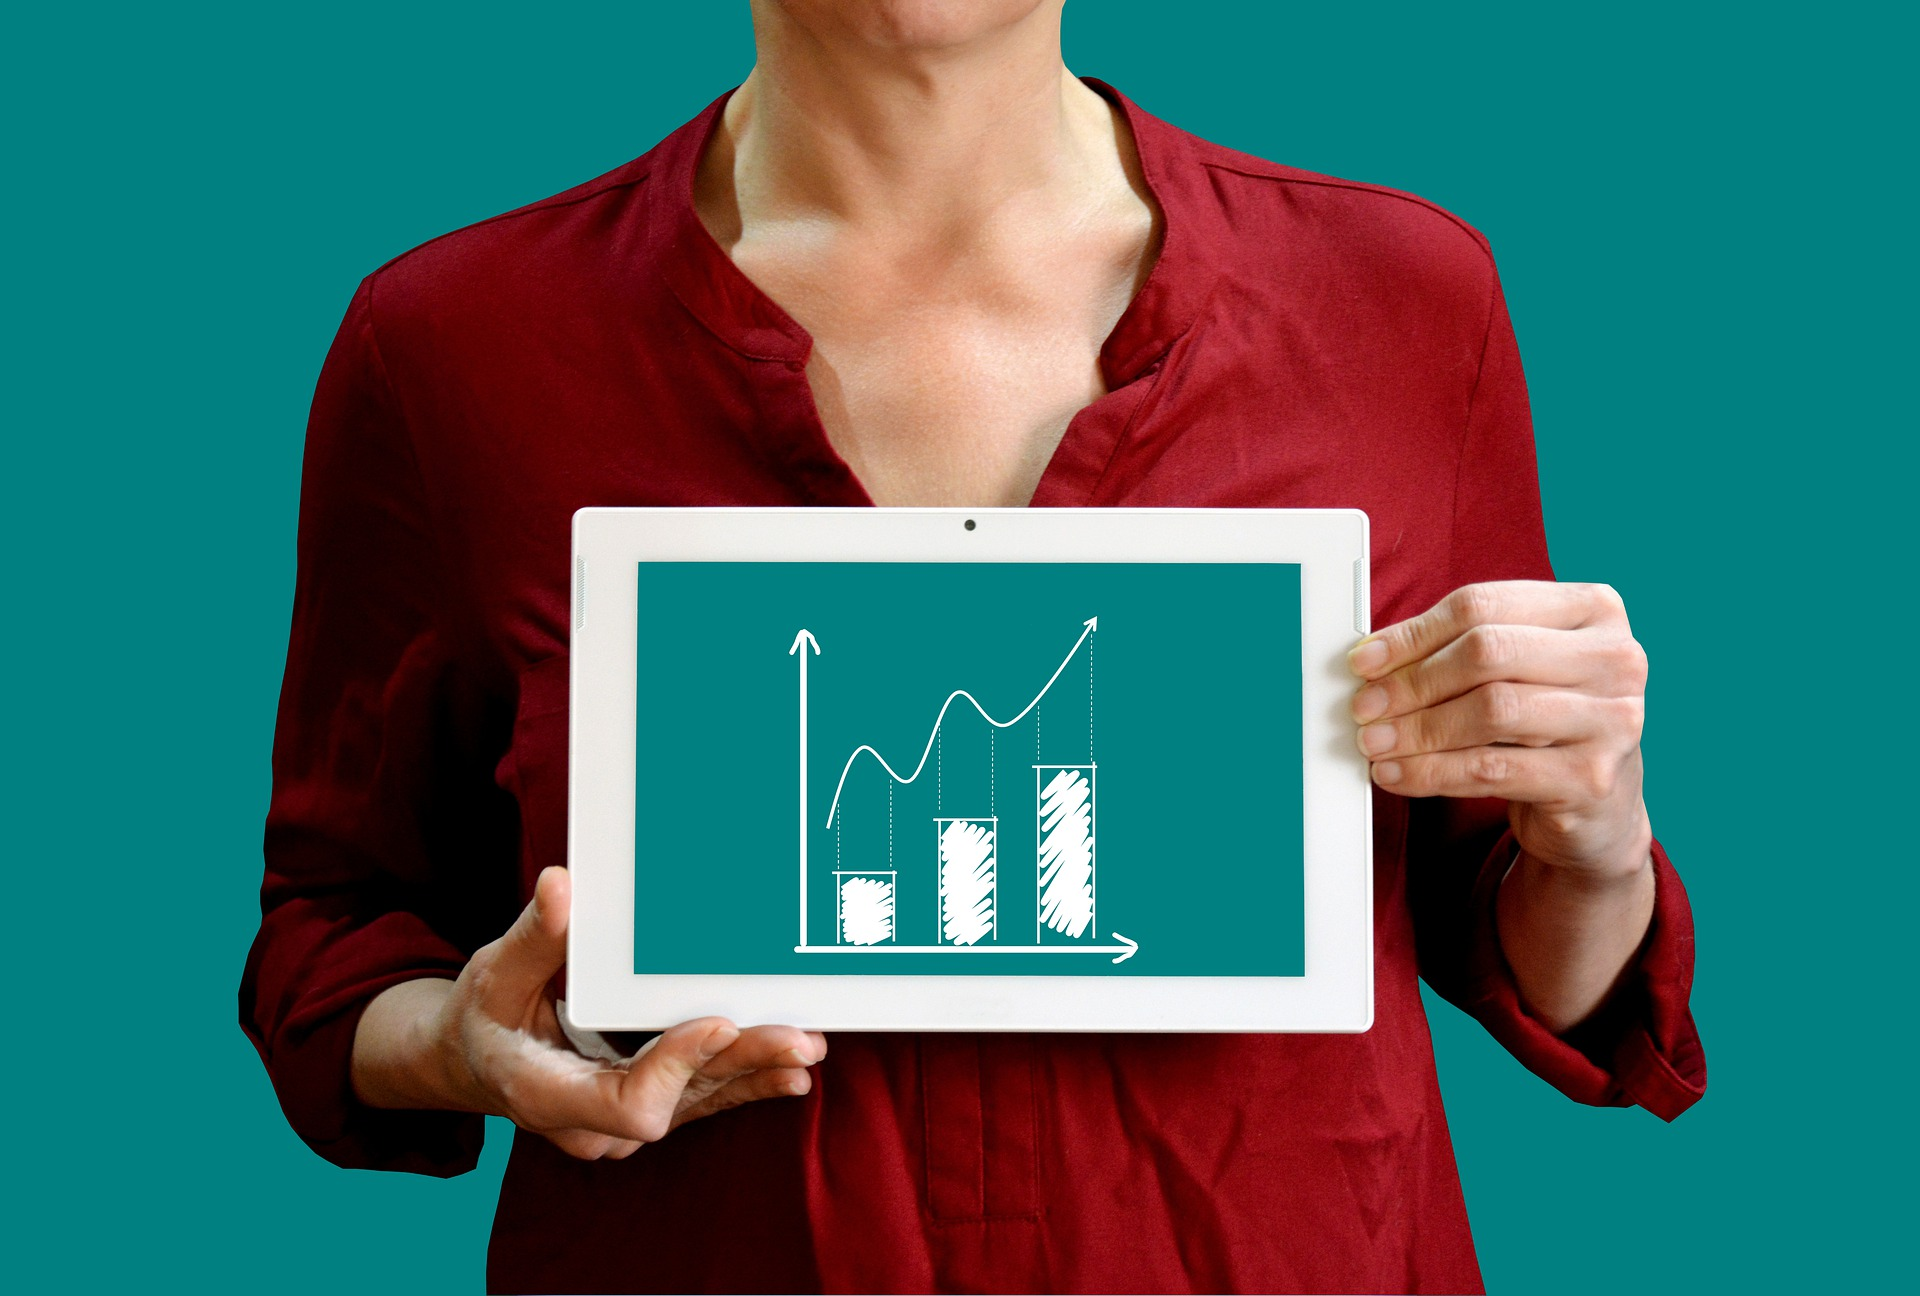

## Dataset

#### LendingClub Issued Loans Dataset 

Data source: https://www.kaggle.com/husainsb/lendingclub-issued-loans

The above dataset contains 759,338 loan records with 72 variables over the period from 2016 to 2017 in the United States region. Some variables include (1) interest rate, (2) grade, (3) state, and (4) loan amount.

## Project Content List

[Topic 1: Are Peer-to-Peer lending (P2P) investments profitable?](#topic1)

[Topic 2: Does risk affects return rates of P2P Investments?](#topic2)

## Topic 1: Are Peer-to-Peer lending (P2P) investments profitable? <a id = "topic1"></a> 

## Introduction 

The principal goal in investing is to maximise profits while maintaining a reasonable degree of risk tolerance. Excess return is one of the most useful indicators in investment performance measurement. Excess return is known as the difference in investment returns over a risk-free rate.

The risk-free rate is the rate of return that an investor may expect from a risk-free investment (e.g. fixed deposit, AAA-rated government treasury bills / bonds) over a specified time period. In terms of valuation, Wall Street analysts generally use the 10-year US treasury yield to approximate the risk-free rate. As at 31 December 2014, the US 10-Year Treasury Constant Maturity Rate is 2.17% (Source: https://fred.stlouisfed.org/series/DGS10).

## Problem Statement 
I aim to conduct a hypothesis testing to **assess if the completed loans from Peer-to-Peer lending (P2P) have positive excess return** (i.e. the completed loans' interest rate is greater than the US 10-Year Treasury Constant Maturity Rate of 2.17%) and hence **determine whether Peer-to-Peer lending (P2P) investments are indeed profitable investments**. 

## Executive Summary

[A. Set Up](#set_up)

[B. Assumptions](#assumptions)

[C. Data Sampling](#sampling)

[D. Hypotheses](#hypo)

[E. Test Statistics](#teststat)

[F. Decision Rule](#decisionrule)

[G. Calculation of Test Statistics and P-value](#calc)

[H. Conclusion](#con)

## A. Set Up <a id = "set_up"></a> 

### i. Import python packages

In [1]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
import scipy.stats as stats
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy.stats import skew
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi 
from scipy.stats import anderson
from scipy.stats import pearsonr

### ii. Dataset loading

In [2]:
# load dataset
df = pd.read_csv("dataset/loan_dataset.csv")

# view head
df.head()

/Users/jasonkhoo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


### iii. Dataframe attributes

In [3]:
#view the dataframe attributes
print(df.info())
print("\n", df.columns)
print("\n", df.shape)
print("\n", df.index)
print("\n", df.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

### iv. Data Wrangling to obtain interested rows and columns

> #### Slicing to obtain required columns

In [4]:
# get interested columns
df=df[['id','int_rate','grade','term','loan_status']]

# view head
df.head()

,id,int_rate,grade,term,loan_status
0,112435993,12.62,C,36 months,Current
1,112290210,12.62,C,60 months,Current
2,112436985,15.05,C,36 months,Current
3,112439006,9.44,B,36 months,Current
4,112438929,11.99,B,36 months,Current


> #### Drop duplicated loans

In [5]:
#check for duplicates using id
print(df['id'].duplicated())
print("---------------------------")

print("Any duplicated loans (identified by 'id' number):")
print(df['id'].duplicated().any())
print(df['id'].duplicated().sum())

0         False
1         False
2         False
3         False
4         False
          ...  
759333    False
759334    False
759335    False
759336    False
759337    False
Name: id, Length: 759338, dtype: bool
---------------------------
Any duplicated loans (identified by 'id' number):
False
0


> #### Filter the dataset rows to include only 'Completed' LoanStatus and drop 'NaN' int_rate

In [6]:
# observe the unique values within the loan_status column
print(df['loan_status'].unique())

['Current' 'Fully Paid' 'In Grace Period' 'Late (31-120 days)'
 'Late (16-30 days)' 'Charged Off' 'Default']


In [7]:
# returns rows on the condition that the loan_status is 'Fully Paid'
df=df.loc[df['loan_status']=='Fully Paid']

# returns rows on the condition that the int_rate is not 'NaN'
df=df[df['int_rate'].notnull()]

#reset row indices 
df = df.reset_index(drop=True)

# look at the final rows and columns from wrangling
print(df.head())

# get the shape of the processed df
print(df.shape)

          id  int_rate grade       term loan_status
0  112038251      7.35     A  36 months  Fully Paid
1  112149045     24.85     E  36 months  Fully Paid
2  112052261      7.35     A  36 months  Fully Paid
3  111999259     16.02     C  60 months  Fully Paid
4  111808508     16.02     C  36 months  Fully Paid
(130718, 5)


### v. Outlier handling on Interest Rate

> #### Box Plot on Interest Rate

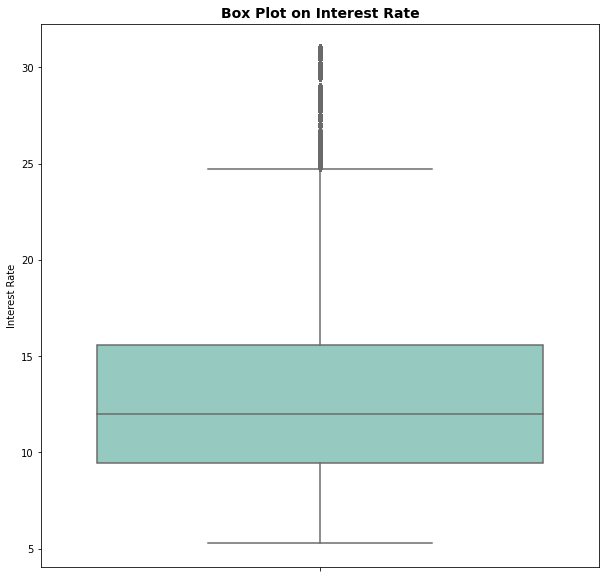

In [8]:
# boxplot on int_rate

#set the figure size for the plot
plt.figure(figsize=(10,10)) 

#Seaborn - box plot
sns.boxplot(data=df, y='int_rate', palette="Set3")

#x-axis, y-axis and title adjustment and labelling
plt.title('Box Plot on Interest Rate',fontweight="bold",fontsize=14)
plt.ylabel('Interest Rate')

# show the graph
plt.show()

- From the box plot, it appears that there are quite a number of outlier above the upper end of the interest rate.

> #### Outlier Removal

The 1st Quartile: 9.44
The 3rd Quartile: 15.59
The IQR (50% between 1st to 3rd QR): 6.15
The Lower Whisker is : 0.21499999999999808 and Upper Whisker is 24.815.


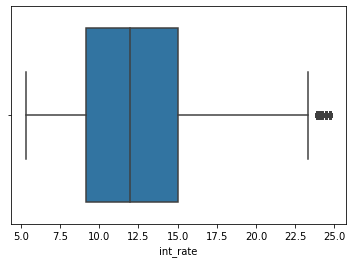

In [9]:
Q1=df['int_rate'].quantile(0.25)
Q3=df['int_rate'].quantile(0.75)
IQR=Q3-Q1
print('The 1st Quartile:', Q1)
print('The 3rd Quartile:', Q3)
print('The IQR (50% between 1st to 3rd QR):', IQR)

Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('The Lower Whisker is : {} and Upper Whisker is {}.'.format(Lower_Whisker, 
                                                                  Upper_Whisker))

#removal of outlier - take only data below upper whisker and above lower whisker
df_postoutlier = df.loc[lambda df: (df['int_rate'] < Upper_Whisker)]

sns.boxplot(data=df_postoutlier,x=df_postoutlier['int_rate'])
plt.show()

/Users/jasonkhoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jasonkhoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


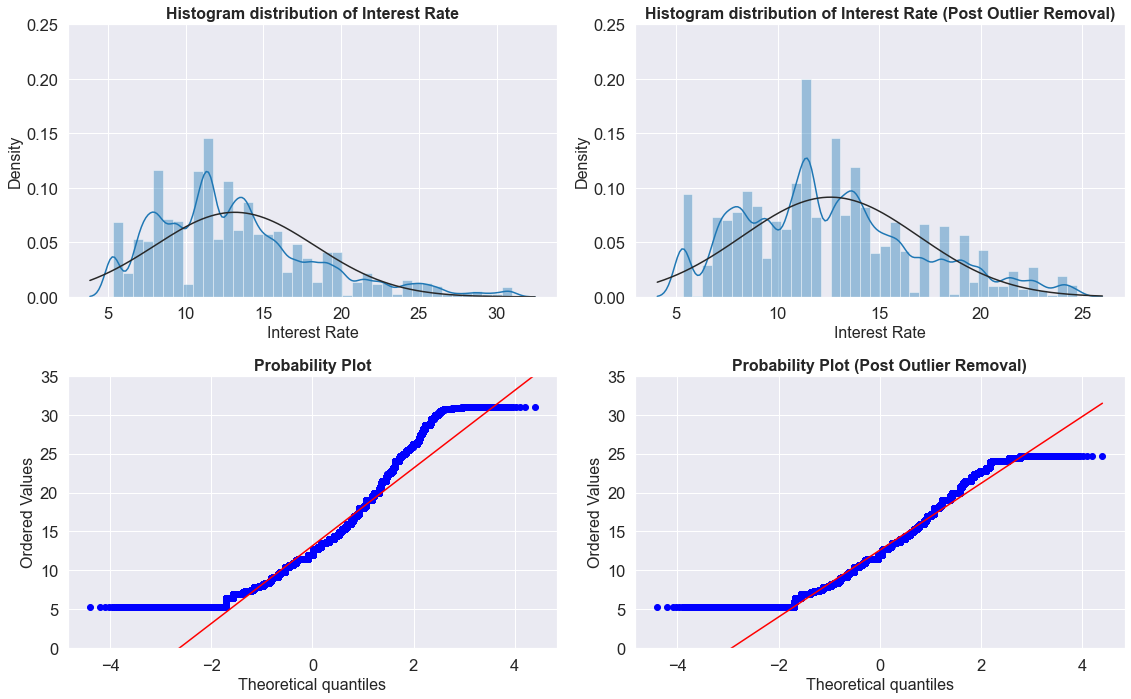

In [10]:
# visualisation on shape
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,
                                                "axes.labelsize":16}) 

plt.subplot(2,2,1)
sns.distplot(df['int_rate'],bins=40,fit=stats.norm,kde=True)
plt.ylim(0,0.25)
plt.title('Histogram distribution of Interest Rate',fontweight="bold")
plt.xlabel('Interest Rate')

plt.subplot(2,2,2)
sns.distplot(df_postoutlier['int_rate'],bins=40,fit=stats.norm,kde=True)
plt.ylim(0,0.25)
plt.title('Histogram distribution of Interest Rate (Post Outlier Removal)',
          fontweight="bold")
plt.xlabel('Interest Rate')

plt.subplot(2,2,3)
stats.probplot(df['int_rate'],dist='norm',plot=plt)
plt.ylim(0,35)
plt.title('Probability Plot',fontweight="bold")

plt.subplot(2,2,4)
stats.probplot(df_postoutlier['int_rate'],dist='norm',plot=plt)
plt.ylim(0,35)
plt.title('Probability Plot (Post Outlier Removal)',fontweight="bold")

plt.tight_layout()
plt.show()

- Based on the comparison between (1) Original and (2) Post Outlier Removal, the data points for the (2) Post Outlier Removal look more 'normal' visually based on the probability plot where the points lies closely in a linear shape. 

In [11]:
# use the post outlier removal dataset as df
df = df_postoutlier

### vi. Descriptive statistics on Interest Rate

In [12]:
# get descriptive statistics
df['int_rate'].describe()

count    125733.000000
mean         12.600459
std           4.358868
min           5.320000
25%           9.170000
50%          11.990000
75%          15.050000
max          24.740000
Name: int_rate, dtype: float64

## B. Assumptions <a id = "assumptions"></a> 

### i. Normality test on population

/Users/jasonkhoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


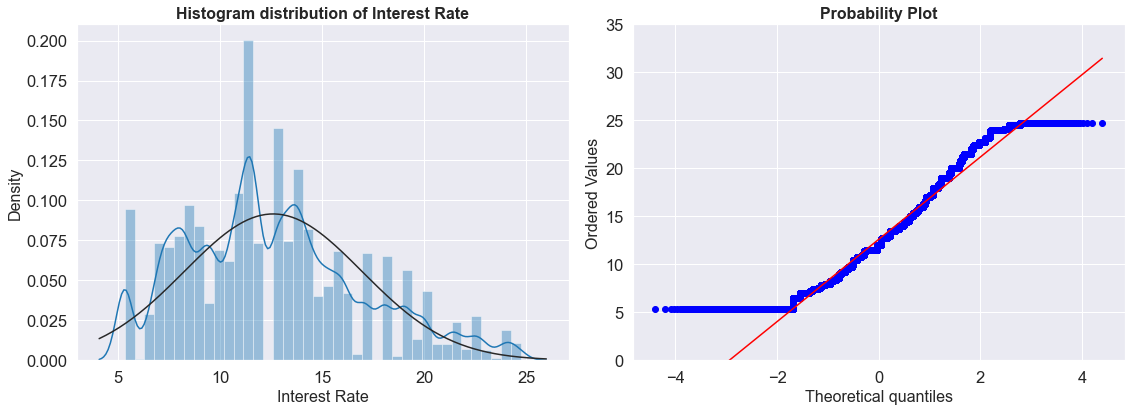

In [13]:
# visualisation on normality
plt.figure(figsize=(16,6))
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,
                                                "axes.titlesize":16,
                                                "axes.labelsize":16}) 

plt.subplot(1,2,1)
sns.distplot(df['int_rate'],bins=40,fit=stats.norm,kde=True)
plt.title('Histogram distribution of Interest Rate',fontweight="bold")
plt.xlabel('Interest Rate')

plt.subplot(1,2,2)
stats.probplot(df['int_rate'],dist='norm',plot=plt)
plt.ylim(0,35)
plt.title('Probability Plot',fontweight="bold")

plt.tight_layout()
plt.show()

> #### **H0: Distribution is normal** 
> #### **H1: Distribution is not normal**

In [14]:
# D'Agostino's K2 test (D'Agostino 1990) Normality Test
stat, p = normaltest(df['int_rate'])

print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Approximately Normally Distributed')
else:
    print('Not Approximately Normally Distributed')

stat=5356.02, p=0.00
Not Approximately Normally Distributed


Since the **p-value (0.00) < significance level (0.05)**, we **reject H0** and conclude that the distribution is not normal at 5% significance level.

In [15]:
# Anderson-Darling Normality Test
result = anderson(df['int_rate'])

print('stat=%.2f' % (result.statistic))
for i in range(len(result.critical_values)):
    significance_level, critical_Value = result.significance_level[i], result.critical_values[i]
    if result.statistic < critical_Value:
        print('Approximately Normally Distributed at %.2f%% level' % (significance_level))
    else:
        print('Not Approximately Normally Distributed %.2f%% level' % (significance_level))

stat=856.70
Not Approximately Normally Distributed 15.00% level
Not Approximately Normally Distributed 10.00% level
Not Approximately Normally Distributed 5.00% level
Not Approximately Normally Distributed 2.50% level
Not Approximately Normally Distributed 1.00% level


By applying the Anderson-Darling Normality Test, the distribution has been concluded that it is not normal.

### ii. Data transformation

> #### In view that certain transformations such as log10 transformation require value to be non-zero, I'll perform a check on the number of rows with zero 'int_rate'

In [16]:
# return rows with zero 'int_rate'
df.loc[df['int_rate']==0]

,id,int_rate,grade,term,loan_status


- In view that there is no rows with zero 'int_rate', I'll proceed on with the various transformation techniques. 

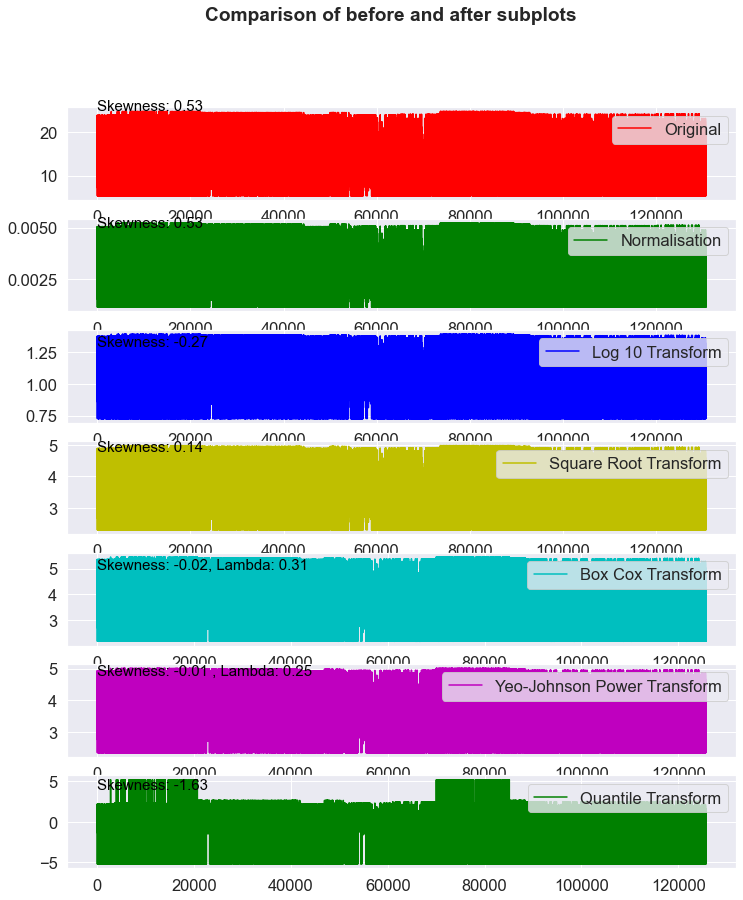

In [17]:
# Before transformation
before_transform = df['int_rate']
before_skew = np.round(before_transform.skew(),2)

# Normalisation
normalised = (before_transform) / np.linalg.norm((before_transform),axis=0)
skew_normalised = np.round(normalised.skew(),2)

# Log10 
log10_transform = np.log10((before_transform))
skew_log10 = np.round(log10_transform.skew(),2)

# Square root 
sqrtx_transform = np.sqrt((before_transform))
skew_sqrtx = np.round(sqrtx_transform.skew(),2)

# Box Cox 
box_cox, Lambda_maxlog = boxcox((before_transform))
skew_boxcox = np.round(skew(box_cox),2)

# Yeo-Johnson - able to do on negative values too
yeo_John, Lambda_Yeo_John = yeojohnson(before_transform)
skew_after_yeoJohn = np.round(skew(yeo_John),2)

# QuantileTransformer
trans = QuantileTransformer(n_quantiles=5000, output_distribution='normal')
quantile_transform = trans.fit_transform(df[['int_rate']]) 
#double [[]] - uses dataframe 1 column instead of series
quantile_transform = pd.DataFrame(quantile_transform) 
#convert to dataframe object as 'numpy.ndarray' object has no attribute 'skew'
quantile_transform = quantile_transform.squeeze() 
#convert to series for skew calculation (unable to convert directly from array to series)
quantile_transform_skew = np.round(quantile_transform.skew(),2)

# Plot visualisation
fig, axs = plt.subplots(7,1,figsize=(12,14))
fig.suptitle('Comparison of before and after subplots',fontweight="bold")
style = dict(size=15, color='black')

axs[0].plot(before_transform, color='r',label="Original")
axs[0].text(0, 25, "Skewness: " + str(before_skew), **style)
axs[0].legend(loc="upper right")

axs[1].plot(normalised, color='g', label="Normalisation")
axs[1].text(0, 0.005, "Skewness: " + str(skew_normalised), **style)
axs[1].legend(loc="upper right")

axs[2].plot(log10_transform, color='b', label="Log 10 Transform")
axs[2].text(0, 1.3, "Skewness: " + str(skew_log10), **style)
axs[2].legend(loc="upper right")

axs[3].plot(sqrtx_transform, color='y', label="Square Root Transform")
axs[3].text(0, 4.8, "Skewness: " + str(skew_sqrtx), **style)
axs[3].legend(loc="upper right")

axs[4].plot(box_cox, color='c', label="Box Cox Transform")
axs[4].text(0, 5, "Skewness: " + str(skew_boxcox)+ ", Lambda: " + str((np.round(Lambda_maxlog,2))), **style)
axs[4].legend(loc="upper right")

axs[5].plot(yeo_John, color='m', label="Yeo-Johnson Power Transform")
axs[5].text(0, 4.8, "Skewness: " + str(skew_after_yeoJohn) + " , Lambda: " + str((np.round(Lambda_Yeo_John,2))) 
            , **style)
axs[5].legend(loc="upper right")

axs[6].plot(quantile_transform, color='g', label="Quantile Transform")
axs[6].text(0, 4, "Skewness: " + str(quantile_transform_skew) , **style)
axs[6].legend(loc="upper right")

plt.show()

- Based on the transformation results, it seems that Yeo-Johnson works the best with the lowest skewness and lambda.
- As such, I will attempt to perform the data transformation using Yeo-Johnson transformation. 

### iii. Normality test on population after Yeo-Johnson Transformation

/Users/jasonkhoo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


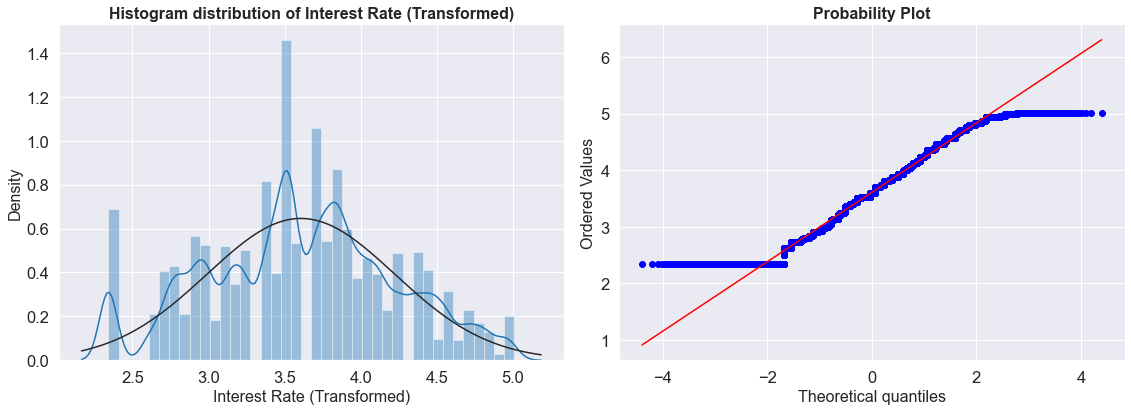

In [18]:
# visualisation on normality
plt.figure(figsize=(16,6))
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 

plt.subplot(1,2,1)
sns.distplot(yeo_John,bins=40,fit=stats.norm,kde=True)
plt.title('Histogram distribution of Interest Rate (Transformed)',fontweight="bold")
plt.xlabel('Interest Rate (Transformed)')

plt.subplot(1,2,2)
stats.probplot(yeo_John,dist='norm',plot=plt)
plt.title('Probability Plot',fontweight="bold")

plt.tight_layout()
plt.show()

- Based on the probability plot, there are data points on the edges that are still slightly off the line after transformation and this indicates that transformed data is not normally distributed.

> #### **H0: Distribution is normal** 
> #### **H1: Distribution is not normal**

In [19]:
# D'Agostino's K2 test (D'Agostino 1990) Normality Test
stat, p = normaltest(yeo_John)

print('stat=%.2f, p=%.4f' % (stat, p))

if p > 0.05:
    print('Approximately Normally Distributed')
else:
    print('Not Approximately Normally Distributed')

stat=2436.08, p=0.0000
Not Approximately Normally Distributed


Since the **p-value (0.00) < significance level (0.05)**, we **reject H0** and conclude that the distribution is not normal at 5% significance level.

In [20]:
# Anderson-Darling Normality Test
result = anderson(yeo_John)

print('stat=%.2f' % (result.statistic))
for i in range(len(result.critical_values)):
    significance_level, critical_Value = result.significance_level[i], result.critical_values[i]
    if result.statistic < critical_Value:
        print('Approximately Normally Distributed at %.2f%% level' % (significance_level))
    else:
        print('Not Approximately Normally Distributed %.2f%% level' % (significance_level))

stat=256.91
Not Approximately Normally Distributed 15.00% level
Not Approximately Normally Distributed 10.00% level
Not Approximately Normally Distributed 5.00% level
Not Approximately Normally Distributed 2.50% level
Not Approximately Normally Distributed 1.00% level


By applying the Anderson-Darling Normality Test, the distribution has been concluded that it is not normal.

### iv. Population Standard Deviation is known

In [21]:
#calculate population standard deviation from the dataset
pop_std = np.std(df['int_rate'], axis=0)
print('The population standard deviation is {}.'.format(round(pop_std,4)))

The population standard deviation is 4.3589.


### vi. Conclusion
- The parent population is not normal. A normality test on the transformed data also revealed that the data does not follow a normal distribution after Yeo-Johnson Transform is performed as presented above. 
- As such, I will attempt to apply **Central Limit Theorem (CLT)** where the **data will follow an approximate normal distribution** given that the sample size that will be achieved is 100 (sufficiently large since it is above 30).
- Population standard deviation is made known (i.e. 4.36).

## C. Data Sampling <a id = "sampling"></a> 

### i. Obtain stratified sample using train_test_split

In [22]:
# count by grade
pop_grpby_risk = df[['id','grade']].groupby('grade').agg(count=pd.NamedAgg(column="grade", 
                                                                           aggfunc="count"))
print('Population Count: ')
print(pop_grpby_risk)

Population Count: 
       count
grade       
A      21980
B      39536
C      39713
D      17713
E       6163
F        627
G          1


- As I would like to perform a stratified sampling via risk grade, my count in each grade has to be greater than 1 for sampling. 
- In view that 'G' risk grade has only 1 record, I will drop the 'G' risk grade.

In [23]:
# drop rows with 'G' grade
df2 = df.loc[df['grade']!='G']
df2 = df2.reset_index(drop=True)
df2

,id,int_rate,grade,term,loan_status
0,112038251,7.35,A,36 months,Fully Paid
1,112052261,7.35,A,36 months,Fully Paid
2,111999259,16.02,C,60 months,Fully Paid
3,111808508,16.02,C,36 months,Fully Paid
4,112087682,11.99,B,36 months,Fully Paid
...,...,...,...,...,...
125727,66495120,17.86,D,36 months,Fully Paid
125728,66444826,11.99,C,36 months,Fully Paid
125729,65792205,18.99,E,60 months,Fully Paid
125730,66501924,13.67,C,36 months,Fully Paid


In [24]:
# stratify based on grade to ensure that sample is well represented in terms of risk grade
X = df2['grade']
y = df2['int_rate']

# to obtain sample size of 100 (100/125732 = 0.0007953424744695065)
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=X, test_size=0.00079534, 
                                                    random_state=42)

print(len(x_test))
print(x_test.index)

100
Int64Index([ 49166, 100540,   9898,  38983,  22393,  51071,  75363,  50092,
             83907, 121630, 116782,  55460,  96607,  16257,  30358,  71558,
            107029,  72208,  65114,  67608,  90422,  93223,  56720,  74443,
             96275,   4489,  46313,  88930, 121099,  87588,  97943,  89970,
             31245,  70278,  25191,  77574, 100119,  38840, 108659,  98123,
            116315,  15738,  14671,  59618,   4902,  75944, 123774,  81828,
             83957,  82051,  57899,  83906,  95129,   8479,  38293,  97079,
              8464,  91115,  32836,  53764,  16254,  58004,   8549,   2053,
             96077,  40161,  41600, 106140,  35735,  86633,  57391, 108493,
             31876,  44293,  50579,  55726,   3346,  28574,  27427, 116395,
             68696,   8632, 117708,  18273,   9372,   5113,  76350,   7076,
             97944,  56625, 125587,  88174,   9027, 113789,  71701,  32059,
             92935,  88746, 100108,  28300],
           dtype='int64')


In [25]:
# convert x_test from series to dataframe before merging
x_test = x_test.to_frame()

# merge x_test and df based on x_test's index
df_sample = pd.merge(x_test, df2, left_index=True, right_index=True)

# drop repeated grade_y column and rename grade_x back to grade
df_sample.drop(columns=['grade_y'],axis=1,inplace=True)
df_sample = df_sample.rename(columns={'grade_x': 'grade'})

# view sample
df_sample

,grade,id,int_rate,term,loan_status
49166,B,82539157,11.49,36 months,Fully Paid
100540,B,73775145,9.16,36 months,Fully Paid
9898,A,102373453,5.32,36 months,Fully Paid
38983,C,84690888,14.49,60 months,Fully Paid
22393,D,88918299,16.99,60 months,Fully Paid
...,...,...,...,...,...
32059,B,85370840,9.49,36 months,Fully Paid
92935,E,75211375,21.97,36 months,Fully Paid
88746,C,76143999,15.31,60 months,Fully Paid
100108,B,73451404,9.75,36 months,Fully Paid


In [26]:
# count by grade to ensure that stratified sample is representative of the population
pop_grpby_risk = df2[['id','grade']].groupby('grade').agg(count=pd.NamedAgg(column="grade", 
                                                                            aggfunc="count"))
print('Population Count: ')
print(pop_grpby_risk)

print("\n---------------------------\n")
sample_grpby_risk = df_sample[['id','grade']].groupby('grade').agg(count=pd.NamedAgg(column="grade", 
                                                                                     aggfunc="count"))
print('Sample Count: ')
print(sample_grpby_risk)

print("\n---------------------------\n")
print('Proportion: ')
print(sample_grpby_risk/pop_grpby_risk)

Population Count: 
       count
grade       
A      21980
B      39536
C      39713
D      17713
E       6163
F        627

---------------------------

Sample Count: 
       count
grade       
A         17
B         31
C         32
D         14
E          5
F          1

---------------------------

Proportion: 
          count
grade          
A      0.000773
B      0.000784
C      0.000806
D      0.000790
E      0.000811
F      0.001595


- Stratified sample is well represented since the sample count chosen for each risk rating is proportional to the population size. 

In [27]:
#get the sample descriptive statistics
print(df_sample['int_rate'].describe())

count    100.000000
mean      12.608300
std        4.527569
min        5.320000
25%        9.160000
50%       12.740000
75%       15.380000
max       24.110000
Name: int_rate, dtype: float64


### ii. Homogeneity of Variances

> #### **Levene's test (Levene 1960) on homogeneity of variances**
> #### **H0: Variances are equal** 
> #### **H1: Variances are not equal**

In [28]:
(test_statistic, p_value) = stats.levene(df_sample['int_rate'],df2['int_rate'],center='median') 
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  0.3267
The p-value is:  0.56761


Since the **p-value (0.56761) > significance level (0.05)**, we **do not reject H0** and conclude that the variances are equal (i.e. homogeneous).

Homogeneity of variances has been established (i.e. sample's variance can be used to approximate population's variance).

## D. Hypotheses <a id = "hypo"></a> 

**Null Hypothesis (H0):** The mean interest rates of completed loans is equals to and above 2.17% (i.e. P2P investments are profitable).

**Alternative Hypothesis (H1):** The mean interest rates of completed loans is below 2.17% (i.e. P2P investments are not profitable).

## E. Test Statistics <a id = "teststat"></a>  
A parametric test, Z-Test shall be used given that the following characteristics: 
- Sample size of 100 chosen is sufficiently large (i.e. greater than 30).
- Data is approximately normally distributed via CLT.
- Population standard deviation is known (i.e. 4.3589).

## F. Decision Rule <a id = "decisionrule"></a>  
- Left tailed test (since H1 < 2.17)
- Significance level set at the standard 0.05 (5%)
- H0 will be rejected if p-value < significance level

## G. Calculation of Test Statistics and P-value <a id = "calc"></a>  

$\begin{align}
  & {{H}_{0}}:\,\mu ≥\,{2.17} \\ 
 & {{H}_{1}}:\,\mu < {2.17} \\ 
\end{align}$

In [29]:
#left tailed test on sample, df_sample
(test_statistic, p_value) = ztest(df_sample['int_rate'], value=2.17, alternative='smaller', 
                                  ddof=1.0)

print("The test statistic is: {}.".format(round(test_statistic,5)))
print("The p-value is: {}.".format(round(p_value,5)))

The test statistic is: 23.05498.
The p-value is: 1.0.


## H. Conclusion  <a id = "con"></a> 

Since the **p-value (1.0) > significance level (0.05)** [and z test statistic (23.05498) > z critical value (-1.96)], we **fail to reject H0** and conclude that the mean interest rates of completed loans is equals to and above 2.17% at 5% significance level.

P2P investments proved to be profitable in terms of generating a positive excess return where the return rates are higher than the US 10-Year Treasury Constant Maturity Rate of 2.17%. 

Investors can consider P2P investments to supplement their investment portfolio to achieve their investment objectives in wealth accumulation. 

count    100.000000
mean      12.608300
std        4.527569
min        5.320000
25%        9.160000
50%       12.740000
75%       15.380000
max       24.110000
Name: int_rate, dtype: float64


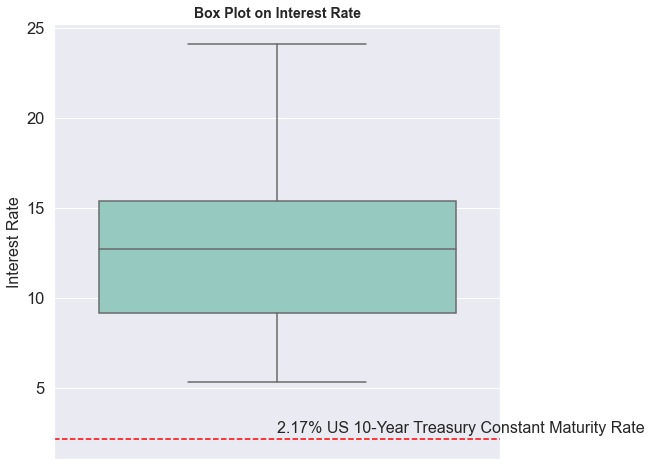

In [30]:
#descriptive stats
print(df_sample['int_rate'].describe())

# boxplot on int_rate

#set the figure size for the plot
plt.figure(figsize=(8,8)) 

#Seaborn - box plot
sns.boxplot(data=df_sample, y='int_rate', palette="Set3")

#x-axis, y-axis and title adjustment and labelling
plt.title('Box Plot on Interest Rate',fontweight="bold",fontsize=14)
plt.ylabel('Interest Rate')

#reference line for 2.17%
plt.axhline(2.17, c='r',linestyle='--')

#annotation for reference line 
plt.annotate('2.17% US 10-Year Treasury Constant Maturity Rate',(0,2.5))

# show the graph
plt.show()

Based on the above descriptive statistics and box plot visualisation, on the basis that the sample is representative of the population, we can tell that P2P investments are most likely to generate a return of above the risk free rate of 2.17% given that the minimum returns is at least 5.32%. 

### Limitations
Investors should take note that the favorable statistical conclusion was arrived as the chosen sample interest rate's 50th percentile (i.e. median) is 12.740000 and mean is 12.608300 based on the descriptive statistics is well above the risk-free rate of 2.17. 

In addition, investors should also note that the population standard deviation of 4%. Using the normal distribution curve, it would mean that 95% of the data lies between 5% (mean of 13% - two times standard deviation of 4%x2 = 8%) to 21% (mean of 13% + two times standard deviation of 4%x2 = 8%). Hence, there is a very strong likelihood that the mean interest rates will be higher than the US 10-Year Treasury Constant Maturity Rate of 2.17%. 

Finally, investors should note that the higher mean return rates comes with risk. Investors should only invest in P2P investments if it is within reasonable levels of their risk tolerance. 

### Future Research
One could explore the use of risk-adjusted interest rates which account for the risk factor in the hypothesis testing to obtain a better reflection on the P2P investment returns. However, this approach might not be straightforward as one would have to quantify the risk involved based on the observable risk attributes and this requires a high level of professional judgment and expertise in finance. 

## Topic 2: Does risk affects return rates of P2P Investments? <a id = "topic2"></a> 

## Introduction 

In investing, risk and return are known to be highly corelated. Taking up a higher risk is often associated with increasing the potential returns on investment.

## Problem Statement 
We aim to conduct a hypothesis testing to **understand whether there is any significant difference in the mean interest rates between the different risk categories** and hence **determine whether risk is a strong determinant in affecting the return rates of P2P investments.**

## Executive Summary

[A. Set Up](#set_up2)

[B. Assumptions](#assumptions2)

[C. Data Sampling](#sampling2)

[D. Hypotheses](#hypo2)

[E. Test Statistics](#teststat2)

[F. Decision Rule](#decisionrule2)

[G. Calculation of Test Statistics and P-value](#calc2)

[H. Conclusion](#con2)

## A. Set Up <a id = "set_up2"></a> 

In [31]:
#view existing df
df

,id,int_rate,grade,term,loan_status
0,112038251,7.35,A,36 months,Fully Paid
2,112052261,7.35,A,36 months,Fully Paid
3,111999259,16.02,C,60 months,Fully Paid
4,111808508,16.02,C,36 months,Fully Paid
6,112087682,11.99,B,36 months,Fully Paid
...,...,...,...,...,...
130713,66495120,17.86,D,36 months,Fully Paid
130714,66444826,11.99,C,36 months,Fully Paid
130715,65792205,18.99,E,60 months,Fully Paid
130716,66501924,13.67,C,36 months,Fully Paid


In [32]:
print(df.columns)

Index(['id', 'int_rate', 'grade', 'term', 'loan_status'], dtype='object')


### i. Correlation Heatmap

> #### Recoding of grade into numerical form

In [33]:
# duplicate another column to grade
df['grade (numeric)']=df['grade']

#risk encoding via creation of a dictionary
riskrecoding={'A':1,
                'B':2,
                'C':3,
                'D':4,
                'E':5,
                'F':6,
                'G':7}

#replace fields with the new recoding
df=df.replace({'grade (numeric)':riskrecoding})
print(df[['grade','grade (numeric)']].head())

  grade  grade (numeric)
0     A                1
2     A                1
3     C                3
4     C                3
6     B                2


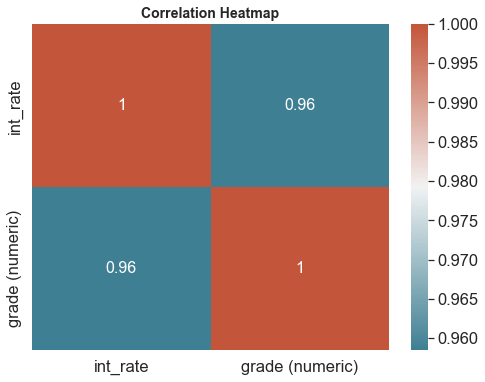

In [34]:
# seaborn heatmap
df_corr = df[['int_rate','grade (numeric)']]
corr = df_corr.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, fmt='.2g',
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Correlation Heatmap',fontweight="bold",fontsize=14)
plt.show()

- Based on the above correlation heatmap, interest rate has a strong correlation (i.e. 0.96) with risk grade.

### ii. Pairwise correlations between risk and return using Pearson's correlation coefficient

> #### **H0: There is no relationship between Risk (grade) and Returns (interest rate) (i.e. independent)** 
> #### **H1: There is some relationship between Risk (grade) and Returns (interest rate) (i.e. not independent)**

In [35]:
(Rho, p_value) = pearsonr(df['int_rate'],df['grade (numeric)'])

print("The Pearson's correlation coefficient is: ", '{:.3f}'.format(Rho))
print("The p-value is:",'{:.3f}'.format(p_value))
if p_value > 0.05:
    print('The two variables are likely independent.')
else:
    print('The two variables are likely dependent.')

The Pearson's correlation coefficient is:  0.958
The p-value is: 0.000
The two variables are likely dependent.


- The Pearson's correlation coefficient test supports the above where there is relationship between risk and returns.

## B. Assumptions <a id = "assumptions2"></a> 

- The parent population is normal via CLT brought forward from Topic 1. 
- Population standard deviation is also known (i.e. 4.36).

## C. Data Sampling <a id = "sampling2"></a> 

### i. Obtain sample from stratified Risk Grade

> #### Step 1 - Stratify the risk rating into 3 main categories: 1. Low Risk [A, B], 2. Mid Risk [C, D, E], 3. High Risk [F, G]

In [36]:
#slice out the 'RiskRatingCombined' column for analysis
risk_strata = df[['grade']]
print('Before Stratification:')
print(risk_strata.head())
print("---------------------------")

#specify the mapping for the fields
risk_strata_remap ={'A':'1. Low Risk',
                    'B':'1. Low Risk',
                    'C':'2. Mid Risk',
                    'D':'2. Mid Risk',
                    'E':'2. Mid Risk',
                    'F':'3. High Risk',
                    'G':'3. High Risk'}

#replace fields with the new mapping
risk_strata=risk_strata.replace({'grade':risk_strata_remap})
print('Stratification:')
print(risk_strata.head())

#put the new mapping column back in the main df
df['gradestrata'] = risk_strata
print("---------------------------")
print('After Stratification:')
print(df[['grade','gradestrata']].head())

Before Stratification:
  grade
0     A
2     A
3     C
4     C
6     B
---------------------------
Stratification:
         grade
0  1. Low Risk
2  1. Low Risk
3  2. Mid Risk
4  2. Mid Risk
6  1. Low Risk
---------------------------
After Stratification:
  grade  gradestrata
0     A  1. Low Risk
2     A  1. Low Risk
3     C  2. Mid Risk
4     C  2. Mid Risk
6     B  1. Low Risk


In [37]:
df[['id','gradestrata']].groupby('gradestrata').agg(count=pd.NamedAgg(column="gradestrata", aggfunc="count"))

,count
gradestrata,
1. Low Risk,61516
2. Mid Risk,63589
3. High Risk,628


> #### Step 2 - Obtain 10 samples from each strata and combine them together in a single sample dataframe

In [38]:
# returns rows on the condition that the gradestrata is low risk / mid risk / high risk
df_lowrisk=df.loc[df['gradestrata']=='1. Low Risk']
df_midrisk=df.loc[df['gradestrata']=='2. Mid Risk']
df_highrisk=df.loc[df['gradestrata']=='3. High Risk']

#pick out 50 sample from each stratas
df_lowrisk_sample = df_lowrisk.sample(n=10, random_state=42)
df_midrisk_sample = df_midrisk.sample(n=10, random_state=42)
df_highrisk_sample = df_highrisk.sample(n=10, random_state=42)

#concat all the 3 different dataframes together
df_risk_sample = pd.concat([df_lowrisk_sample,df_midrisk_sample,df_highrisk_sample])
df_risk_sample

,id,int_rate,grade,term,loan_status,grade (numeric),gradestrata
37065,85803955,10.99,B,36 months,Fully Paid,2,1. Low Risk
64879,77371457,8.39,B,36 months,Fully Paid,2,1. Low Risk
104011,73675158,11.47,B,36 months,Fully Paid,2,1. Low Risk
10732,102043571,11.49,B,36 months,Fully Paid,2,1. Low Risk
9913,103157282,11.49,B,36 months,Fully Paid,2,1. Low Risk
67894,77466559,7.39,A,36 months,Fully Paid,1,1. Low Risk
26396,88889614,10.49,B,36 months,Fully Paid,2,1. Low Risk
60894,77301270,9.75,B,60 months,Fully Paid,2,1. Low Risk
584,111548230,10.91,B,36 months,Fully Paid,2,1. Low Risk
15734,97607088,11.49,B,36 months,Fully Paid,2,1. Low Risk


### ii. Homogeneity of Variances for Different Groups

> #### **Levene's test (Levene 1960) on homogeneity of variances**
> #### **H0: Variances are equal** 
> #### **H1: Variances are not equal**

In [39]:
(test_statistic, p_value) = stats.levene(df_lowrisk_sample['int_rate'],
                                         df_midrisk_sample['int_rate'],
                                         df_highrisk_sample['int_rate']) 
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  3.05783
The p-value is:  0.06353


Since the **p-value (0.06353) > significance level (0.05)**, we **do not reject H0** and conclude that the variances are equal (i.e. homogeneous).

Homogeneity of variances has been established (i.e. 3 samples that will be used for testings has variances that are homogeneous).

## D. Hypotheses <a id = "hypo2"></a> 

**Null Hypothesis (H0):** There is no significant difference in the mean interest rates from the 3 different risk stratas identified (i.e. risk is not a strong determinant in affecting the return rates of P2P investments).

**Alternative Hypothesis (H1):** There is significant difference in the mean interest rates from the 3 different risk stratas identified (i.e. risk is a strong determinant in affecting the return rates of P2P investments).

## E. Test Statistics <a id = "test_stat2"></a> 
An One-Way ANOVA test shall be used given that the following characteristics: 
- Data is approximately normally distributed.
- Each sample is drawn independently of the other samples via random sampling.
- Variance of data in different sample groups are homogeneneous.
- Dependent variable (i.e. interest rates) is continuous.

## F. Decision Rule <a id = "decisionrule2"></a> 
- Significance level set at the standard 0.05 (5%)
- H0 will be rejected if p-value < significance level

## G. Calculation of Test Statistics and P-value <a id = "calc2"></a> 

\begin{align}
  & {{H}_{0}}:\,\,\mu _{1}\,=\,\,\mu _{2}\,=\,\,\mu _{3} \\
 & {{H}_{1}}:\,\,\mu _{1}\,\ne \,\,\mu _{2}\,\ne \,\,\mu _{3} \\ 
\end{align}

In [40]:
model = smf.ols('int_rate ~ C(gradestrata)', data=df_risk_sample).fit()  
aov_table = anova_lm(model, typ=2)  
print(aov_table)

                    sum_sq    df           F        PR(>F)
C(gradestrata)  829.510247   2.0  159.804273  1.085377e-15
Residual         70.075650  27.0         NaN           NaN


## H. Conclusion <a id = "con2"></a> 

Since the **p-value (0) < significance level (0.05)**, we **reject H0** and conclude that there is significant difference in the mean interest rates from the 3 different risk stratas identified at 5% significance level.

Risk is a strong determinant in affecting the return rates of P2P investments since different risk categories do affect the mean interest rates.

Low Risk:
count    10.000000
mean     10.386000
std       1.447075
min       7.390000
25%       9.935000
50%      10.950000
75%      11.485000
max      11.490000
Name: int_rate, dtype: float64
Mid Risk:
count    10.000000
mean     15.690000
std       2.313377
min      12.990000
25%      14.460000
50%      14.770000
75%      16.740000
max      19.990000
Name: int_rate, dtype: float64
High Risk:
count    10.000000
mean     23.203000
std       0.583477
min      22.450000
25%      23.130000
50%      23.130000
75%      23.130000
max      24.240000
Name: int_rate, dtype: float64


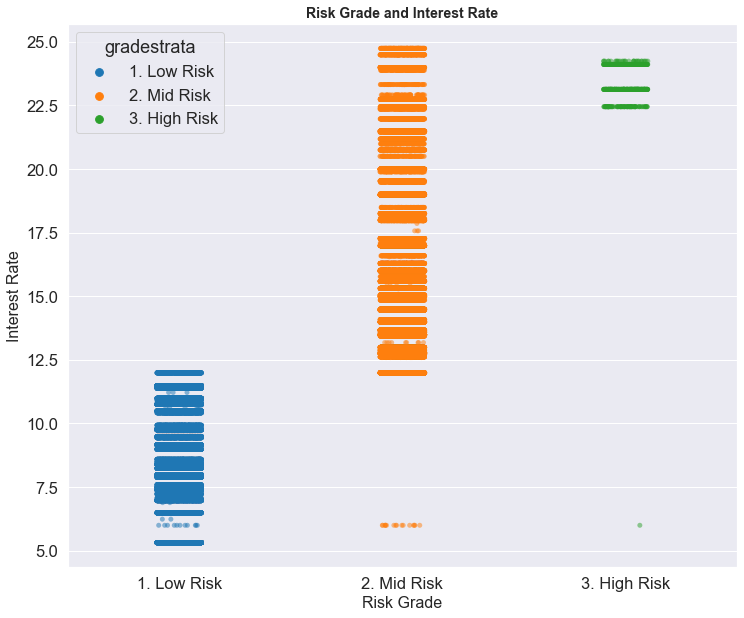

In [41]:
#descriptive stats
print("Low Risk:")
print(df_lowrisk_sample['int_rate'].describe())
print("Mid Risk:")
print(df_midrisk_sample['int_rate'].describe())
print("High Risk:")
print(df_highrisk_sample['int_rate'].describe())

#set the figure size for the plot
plt.figure(figsize=(12,10))

#stripplot
sns.stripplot(data=df, x="gradestrata", y="int_rate",hue="gradestrata", alpha=0.5)

#x-axis, y-axis and title adjustment and labelling
plt.xlabel('Risk Grade')
plt.ylabel('Interest Rate')
plt.title('Risk Grade and Interest Rate',fontweight="bold",fontsize=14)

# show the graph
plt.show()

However, based on the analysis from the descriptive statistics and visualisation, it is certain that low risk has a lower interest rate as compared to both mid risk and high risk. This is illustrated by low risk having a median of 11% while mid risk and high risk have a median of 15% and 23% respectively.

### Limitations
Users should keep in mind that One-Way ANOVA assessed only whether the mean interest rates for each risk stratas are all similar at the same time or at least 1 across all groups is different. It did not indicate which stratas within the 3 groups are statistically different from each other. 

### Future Research
One could explore the use of Post-Hoc to determine which risk stratas has the highest mean interest rate and also the specific differences between the 3 risk stratas. 

### Post-Hoc Analysis

> #### Tukey-hsd multiple comparison to assess which pair of risk stratas are significantly difference from each other

In [42]:
# (1) Low Risk vs Mid Risk, (2) Mid Risk vs High Risk, (3) Low Risk vs High Risk

mc_risk = multi.MultiComparison(df_risk_sample['int_rate'], df_risk_sample['gradestrata'])
results_risk  = mc_risk.tukeyhsd() 

print(results_risk.summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2    meandiff p-adj lower  upper  reject
------------------------------------------------------------
1. Low Risk  2. Mid Risk    5.304 0.001  3.518   7.09   True
1. Low Risk 3. High Risk   12.817 0.001 11.031 14.603   True
2. Mid Risk 3. High Risk    7.513 0.001  5.727  9.299   True
------------------------------------------------------------


- Based on the above summary, all the different 3 permutations [(1) Low Risk vs Mid Risk, (2) Mid Risk vs High Risk, (3) Low Risk vs High Risk] indicates that the mean interest rates are significantly different (i.e. reject = True).

> #### Box plot display

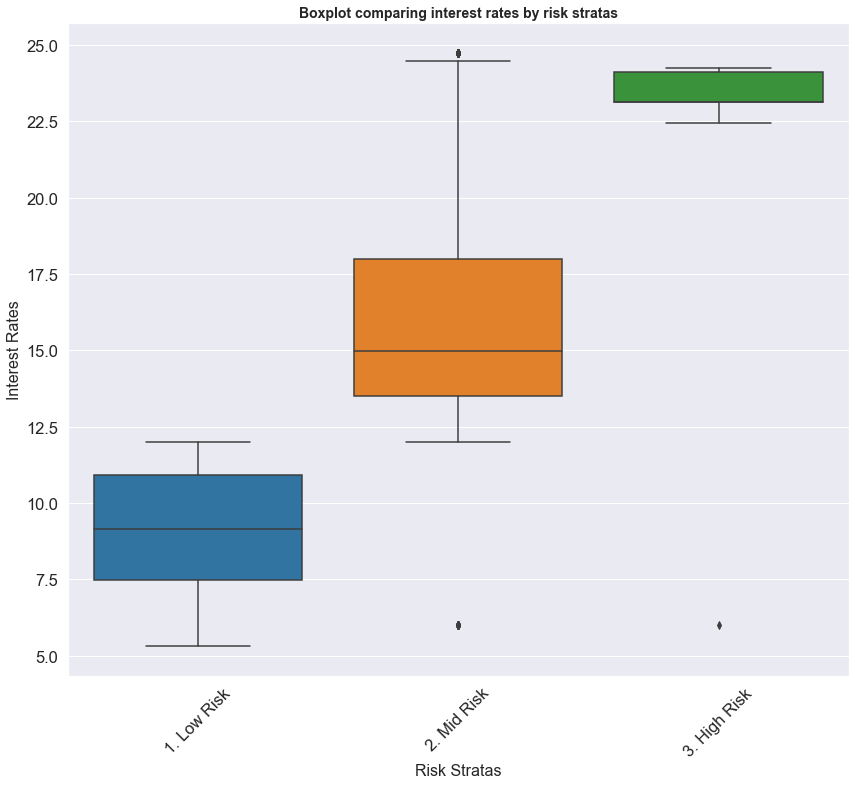

In [43]:
plt.figure(figsize=(14,12))
sns.boxplot(x='gradestrata', y='int_rate', data=df)
plt.xlabel('Risk Stratas')
plt.ylabel('Interest Rates')
plt.title('Boxplot comparing interest rates by risk stratas',fontweight="bold",fontsize=14)
plt.xticks(rotation=45)
plt.show()

- The above visualisation results is in line with the results from the tukey-hsd test which states that all 3 risk stratas are statistically different since there is no overlap between their IQRs. 

**Median interest rates:** High Risk > Mid Risk > Low Risk

> #### Paired Sample T-test to confirm validity of Post-Hoc and ANOVA

**1. Low Risk vs Mid Risk**

\begin{align}
  & {{H}_{0}}:\,\,\mu _{1}\,=\,\,\mu _{2}\\
 & {{H}_{1}}:\,\,\mu _{1}\,\ne \,\,\mu _{2}\\ 
\end{align}

In [44]:
(test_statistic, p_value) = stats.ttest_rel(df_lowrisk_sample['int_rate'], df_midrisk_sample['int_rate'], 
                                            nan_policy='omit')  
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -8.00972
The p-value is:  2e-05


Since the **p-value (0) < significance level (0.05)**, we **reject H0** and conclude that there is significant difference in the mean interest rates between low risk and mid risk.

**2. Mid Risk vs High Risk**

\begin{align}
  & {{H}_{0}}:\,\,\mu _{2}\,=\,\,\mu _{3}\\
 & {{H}_{1}}:\,\,\mu _{2}\,\ne \,\,\mu _{3}\\ 
\end{align}

In [45]:
(test_statistic, p_value) = stats.ttest_rel(df_midrisk_sample['int_rate'], df_highrisk_sample['int_rate'], 
                                            nan_policy='omit')  
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -8.52075
The p-value is:  1e-05


Since the **p-value (0) < significance level (0.05)**, we **reject H0** and conclude that there is significant difference in the mean interest rates between mid risk and high risk.

**3. Low Risk vs High Risk**

\begin{align}
  & {{H}_{0}}:\,\,\mu _{1}\,=\,\,\mu _{3}\\
 & {{H}_{1}}:\,\,\mu _{1}\,\ne \,\,\mu _{3}\\ 
\end{align}

In [46]:
(test_statistic, p_value) = stats.ttest_rel(df_lowrisk_sample['int_rate'], df_highrisk_sample['int_rate'], 
                                            nan_policy='omit')  
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -25.37348
The p-value is:  0.0


Since the **p-value (0) < significance level (0.05)**, we **reject H0** and conclude that there is significant difference in the mean interest rates between low risk and high risk.

### Final Statistical Conclusion

The paired t-test validity check is in line with both the results from the ANOVA and Tukey HSD, where the mean interest rates for all three different risk category is different. 

## Credits

Cover Image Attribution: Pixabay (www.pixabay.com)